## 목표 : 분석 및 예측 모델
    0. 데이터수집
    1. 파이썬
    - 시각화, 딕셔너리, 판다스, 로직, 흐름제어, 필터링, 반복구조
    - 람다함수, 이터레이터, 리스트 컴프리헨션
    2. 데이터 정제
    - 정제 기술, EDA(탐색적 분석), VED(시각적 데이터 탐색)
    - 피봇테이블, 결합, 누락값 등 처리
    3. 데이터 분석
    - 판다스, 데이터프레임 생성
    - VED, 통계적 분석(상관계수), 시계열 인덱싱
    - 데이터프레임 슬라이싱, 변환, 필터링, melt, 카테고리화
    - 스택/언스택, 피봇테이블 등
    4. 데이터시각화
    - seaborn, matplotlib 등
    5. 머신러닝 & 딥러닝
    신경망 -> 한계 -> RF,SVM -> DL(ANN->CNN->RNN)
    

### 회귀/ 분류? => 회귀 => 자전거대여량 예측문제

In [20]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})
plt.style.use(["default"])

In [2]:
train=pd.read_csv("data/bike-sharing-demand/train.csv",parse_dates=["datetime"])
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [5]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [6]:
train.isnull().sum() # 데이터 분석시 반드시 필요한 작업(null값 확인)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

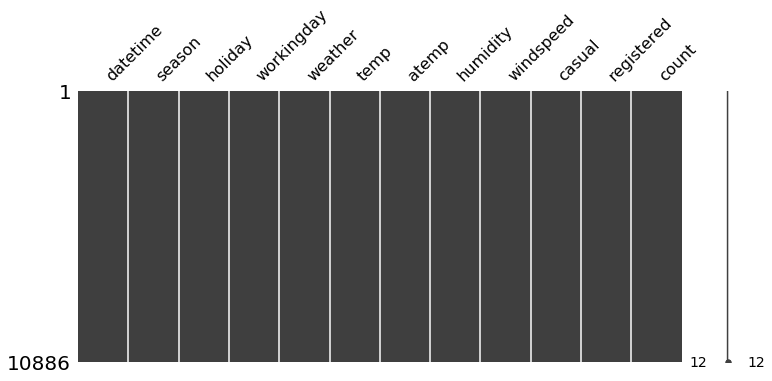

In [7]:
import missingno as msno
msno.matrix(train, figsize=(12,5))

In [8]:
train.datetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
5       2011-01-01 05:00:00
6       2011-01-01 06:00:00
7       2011-01-01 07:00:00
8       2011-01-01 08:00:00
9       2011-01-01 09:00:00
10      2011-01-01 10:00:00
11      2011-01-01 11:00:00
12      2011-01-01 12:00:00
13      2011-01-01 13:00:00
14      2011-01-01 14:00:00
15      2011-01-01 15:00:00
16      2011-01-01 16:00:00
17      2011-01-01 17:00:00
18      2011-01-01 18:00:00
19      2011-01-01 19:00:00
20      2011-01-01 20:00:00
21      2011-01-01 21:00:00
22      2011-01-01 22:00:00
23      2011-01-01 23:00:00
24      2011-01-02 00:00:00
25      2011-01-02 01:00:00
26      2011-01-02 02:00:00
27      2011-01-02 03:00:00
28      2011-01-02 04:00:00
29      2011-01-02 06:00:00
                ...        
10856   2012-12-18 18:00:00
10857   2012-12-18 19:00:00
10858   2012-12-18 20:00:00
10859   2012-12-18 21:00:00
10860   2012-12-18 2

In [9]:
# 년도, 월별에 따른 자전거 대여수를 확인해볼 필요가 있음
train['year']=train['datetime'].dt.year # 연도 추출
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train.shape
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [83]:
# 한글 안깨지는 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

[Text(0.5, 1.0, '시간별 대여량')]

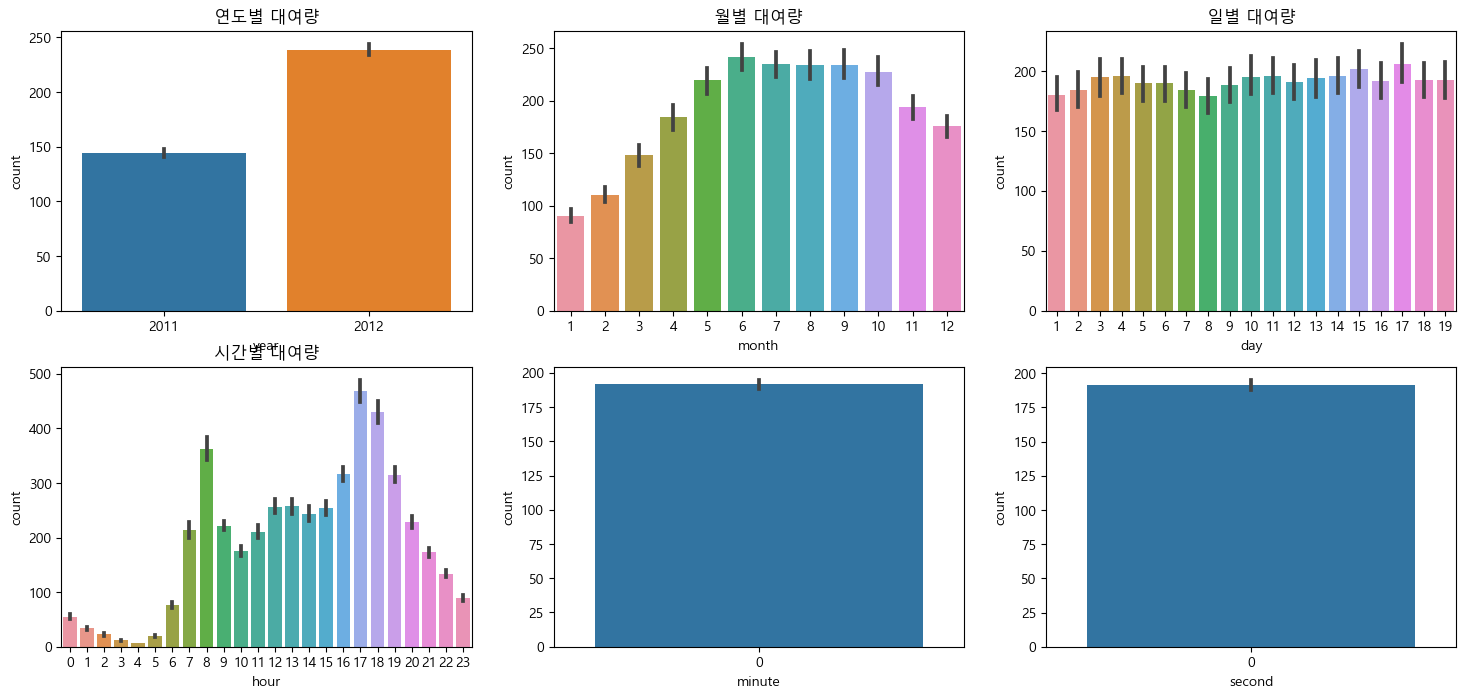

In [84]:
#어떤 feature 가 관련이 있는 시각화
# axes : 축으로 이루어진 창(axis의 집합) , axis : 축, figure : 전체 하나의 창 
# 탐색적 분석에서 반드시 필요한 작업
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2, ncols=3) 
# ax는 각 창을 받음.
fig.set_size_inches(18,8) # 창의 크기 조절
# seaborn 패키지가 좀 더 깔끔함
sns.barplot(data=train,x="year",y="count", ax=ax1)  #ax:창의 위치를 설정하는 속성 
sns.barplot(data=train,x="month",y="count", ax=ax2)
sns.barplot(data=train,x="day",y="count", ax=ax3)
sns.barplot(data=train,x="hour",y="count", ax=ax4)
sns.barplot(data=train,x="minute",y="count", ax=ax5)
sns.barplot(data=train,x="second",y="count", ax=ax6)
ax1.set(title="연도별 대여량")
ax2.set(title="월별 대여량")
ax3.set(title="일별 대여량")
ax4.set(title="시간별 대여량")
# 대여량은 자동적으로 평균 함수를 써서 출력

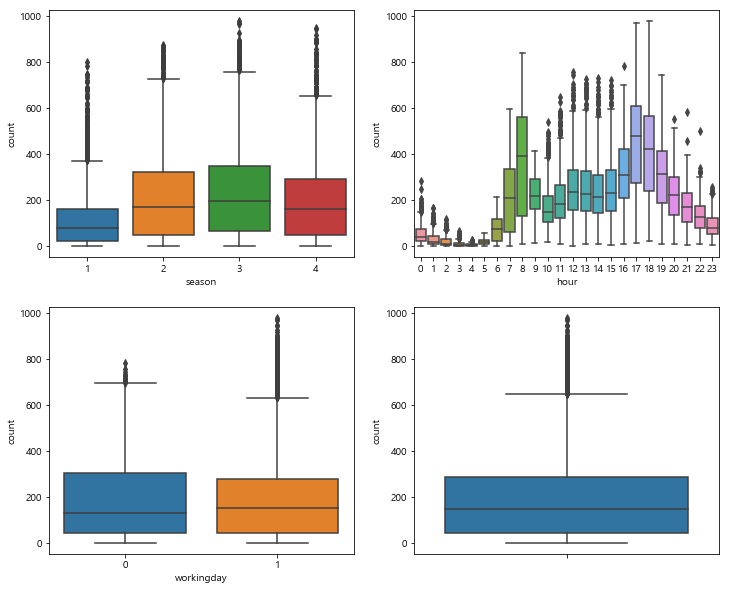

In [12]:
# subplot을 그리는 다른 방법
fig, axes=plt.subplots(nrows=2, ncols=2) 
fig.set_size_inches(12,10)
# 계절별 빈도수
sns.boxplot(data=train,y='count',x='season',orient='v',ax=axes[0][0]) 
# ax:0행 0열 위치에 그래프 그리기, orient='v'(default)
sns.boxplot(data=train,y='count',x='hour',orient='v',ax=axes[0][1]) 
sns.boxplot(data=train,y='count',x='workingday',orient='v',ax=axes[1][0]) 
sns.boxplot(data=train,y='count',orient='v',ax=axes[1][1]) # x축:대여량

In [13]:
# 요일별로 추출할 때 (dayofweek, day_name:요일별 이름)
train["dayofweek"]=train["datetime"].dt.dayofweek
train['dayofweek']
# 0:월요일 - 6:일요일
train.shape

(10886, 19)

In [14]:
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

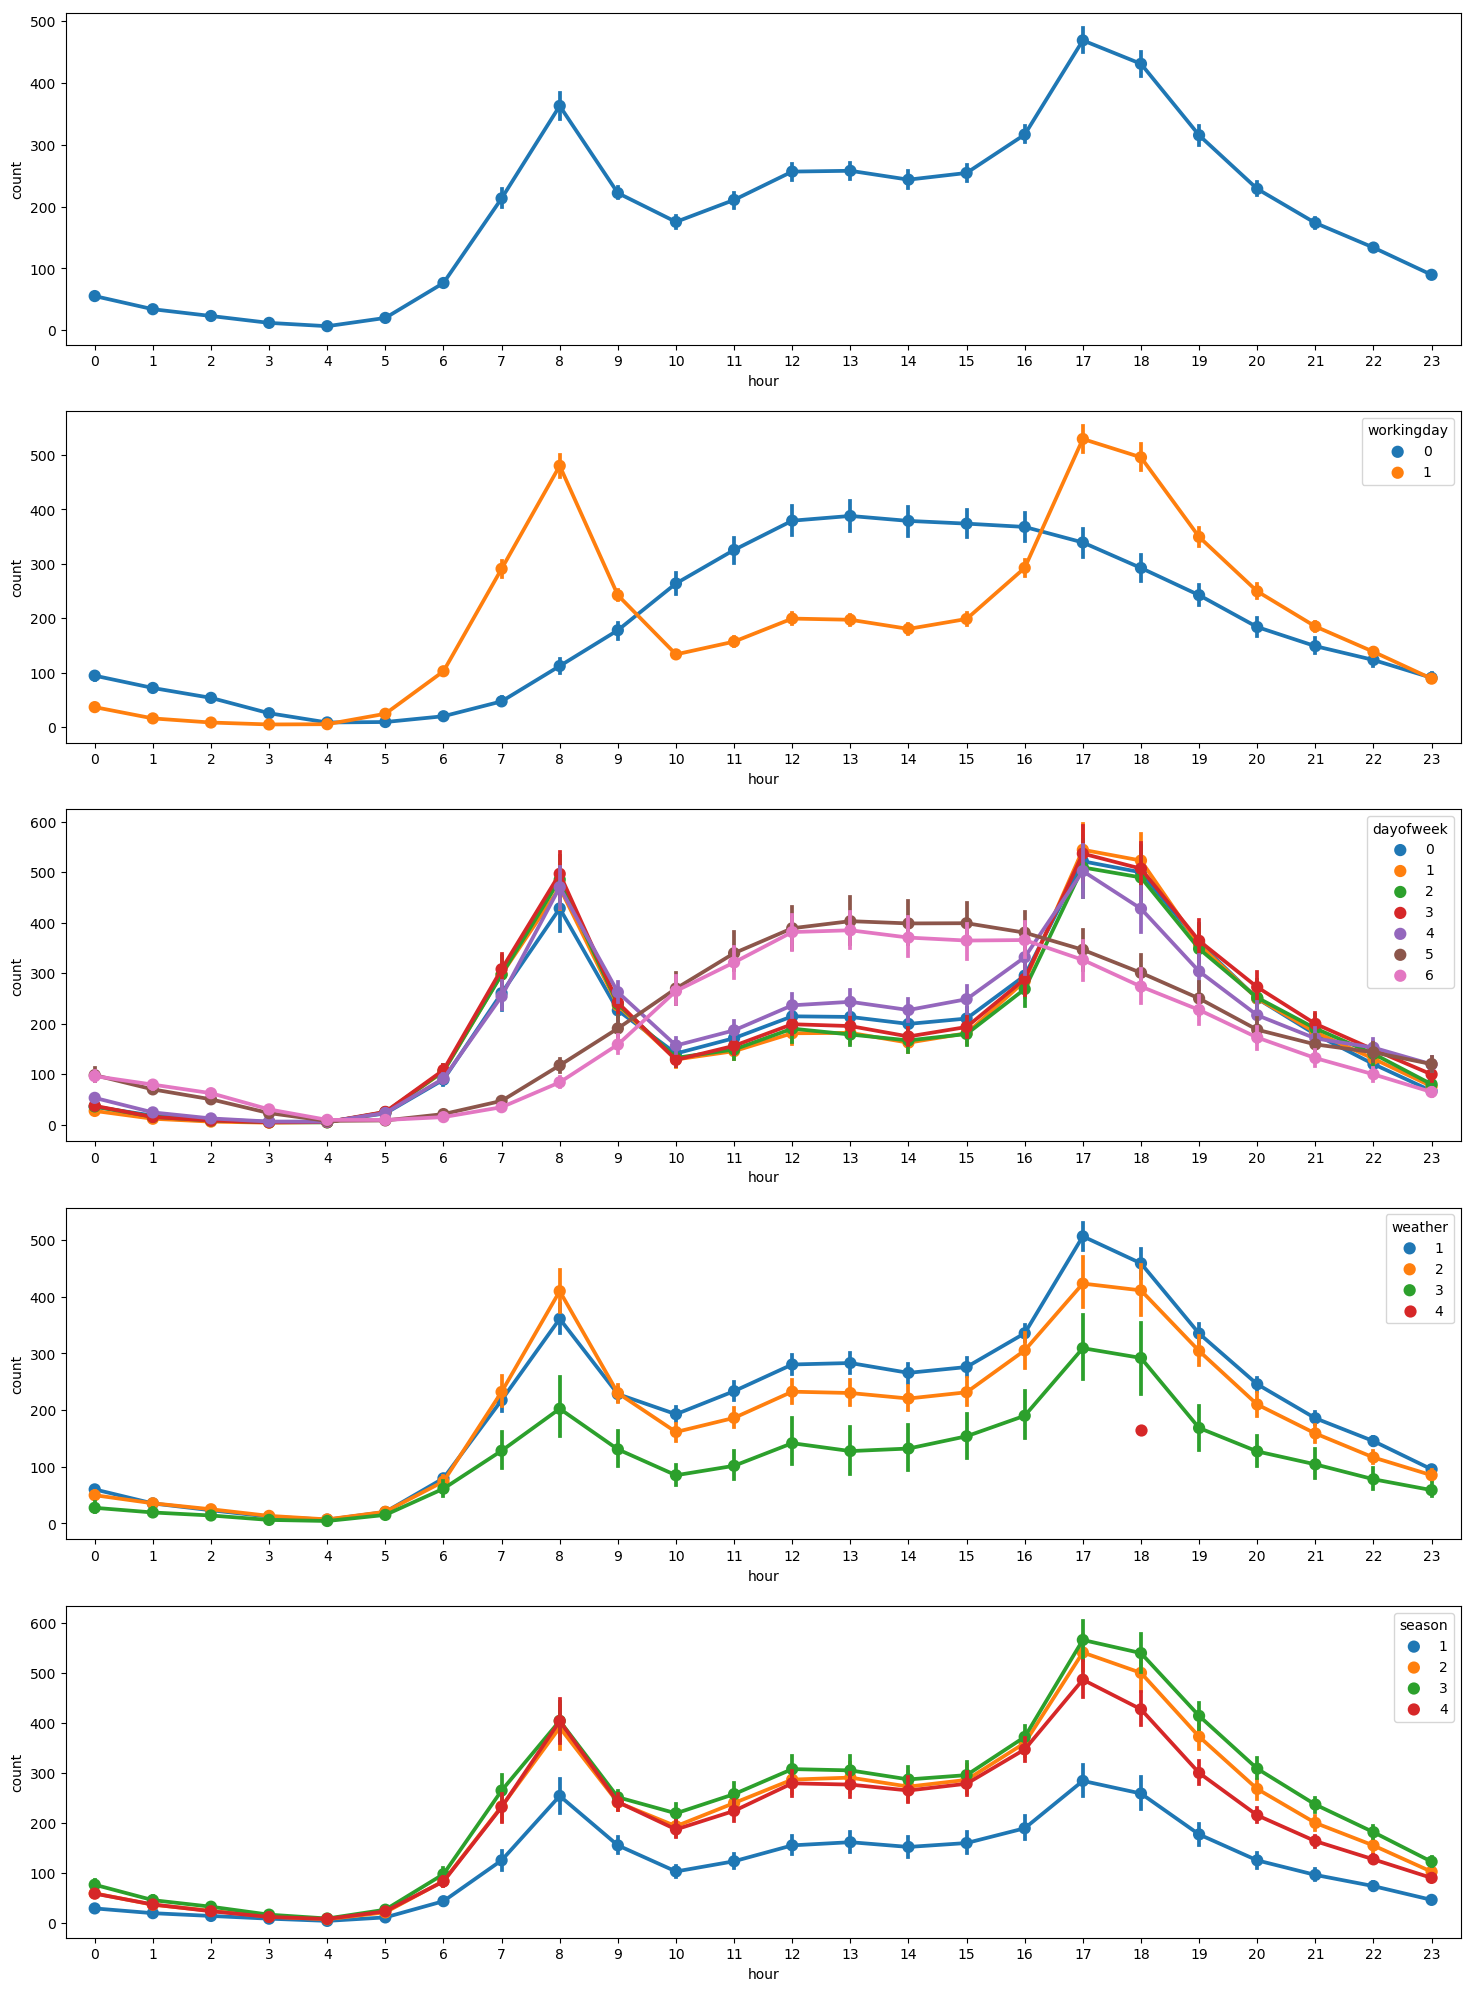

In [22]:
# 시간의 흐름에 따른 그래프(0~23)
# 근무일의 여부에 따른 그래프(0,1)
# 요일에 따른 그래프(0,6)
# 계절에 따른 그래프(1~4)
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5)
fig.set_size_inches(18,25)
sns.pointplot(data=train, x='hour',y='count',ax=ax1) #count의 합
sns.pointplot(data=train,x='hour',y='count',hue='workingday',ax=ax2)
sns.pointplot(data=train,x='hour',y='count',hue='dayofweek',ax=ax3)
sns.pointplot(data=train,x='hour',y='count',hue='weather',ax=ax4)
#날씨가 4인 경우에는 데이터가 1개 밖에 없어 어떻게 처리할지 고민해봐야함
sns.pointplot(data=train,x='hour',y='count',hue='season',ax=ax5)

### 상관계수
    - 피어슨 상관계수 : 자료가 정규분포 따를 때
    - 스피어만 상관계수 : 자료가 정규분포를 따르지 않을 떄
    - 파이 상관계수 : 명목형 (범주2개)
    - 크래머 v 계수 : 명목형 (범주 2개 초과)

In [16]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [17]:
corrMatt=train[["temp","atemp","casual","registered","humidity", "windspeed","count"]]

In [18]:
# +1,-1에 가까울수록 변수들의 상관성이 높다는 의미
corrMatt=corrMatt.corr()
# 상관관계를 보면 count는 casual보다 registered에 의한 영향이 크다는 걸 알 수 있음

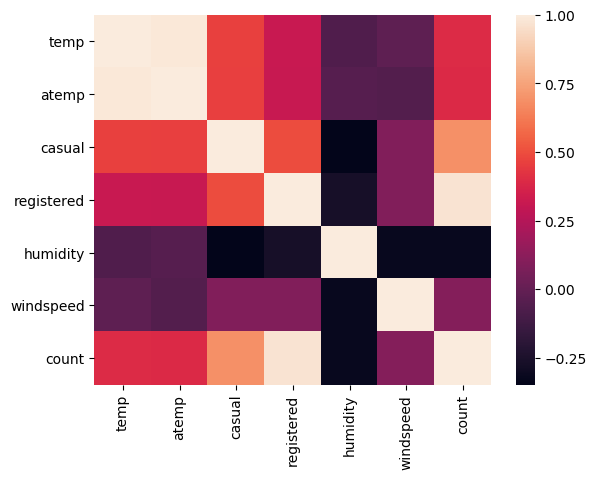

In [27]:
sns.heatmap(corrMatt)

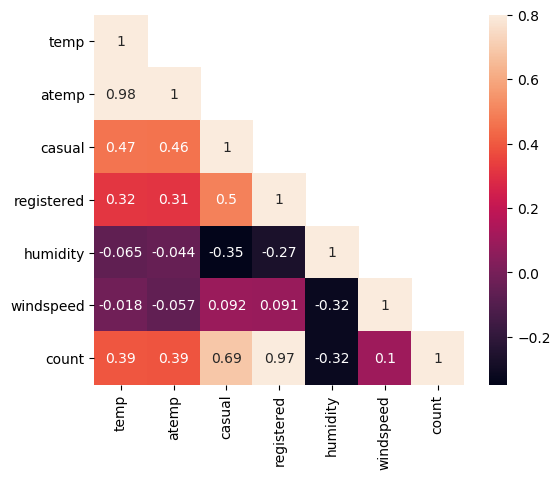

In [34]:
import numpy as np
# 히트맵에서 한쪽만 나오도록 출력하는 함수 활용
mask=np.array(corrMatt)
mask
mask[np.tril_indices_from(mask)]=False
sns.heatmap(corrMatt, mask=mask, square=True, annot=True, vmax=.8) # vmax: 최대값 설정

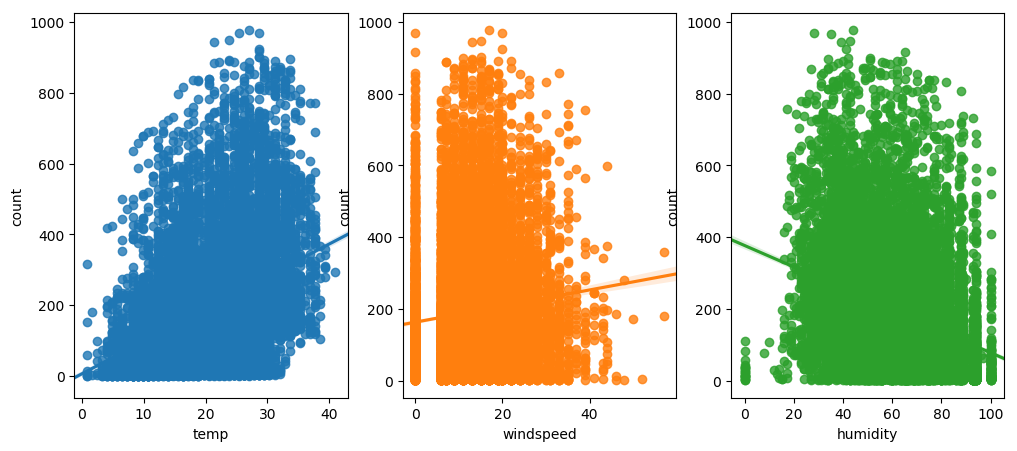

In [35]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x="temp", y="count", data=train, ax=ax1)
sns.regplot(x="windspeed", y="count", data=train, ax=ax2)
sns.regplot(x="humidity", y="count", data=train, ax=ax3)
#winspeed 0은 데이터 전처리 때, 처리해줘야할 것으로 보임

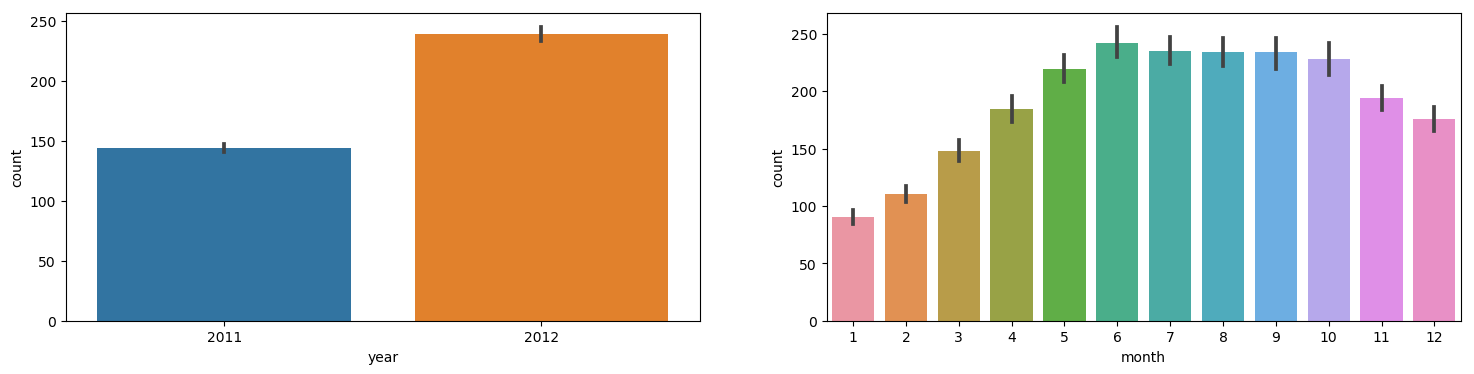

In [43]:
# 년도별로 나눠서 시각화
def cym(dtime):
    return "{0}-{1}".format(dtime.year,dtime.month)

train['year_month']=train['datetime'].apply(cym)
train['year_month']

fig, (ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(18,4)
sns.barplot(data=train,x="year",y="count",ax=ax1)
sns.barplot(data=train,x="month",y="count",ax=ax2)

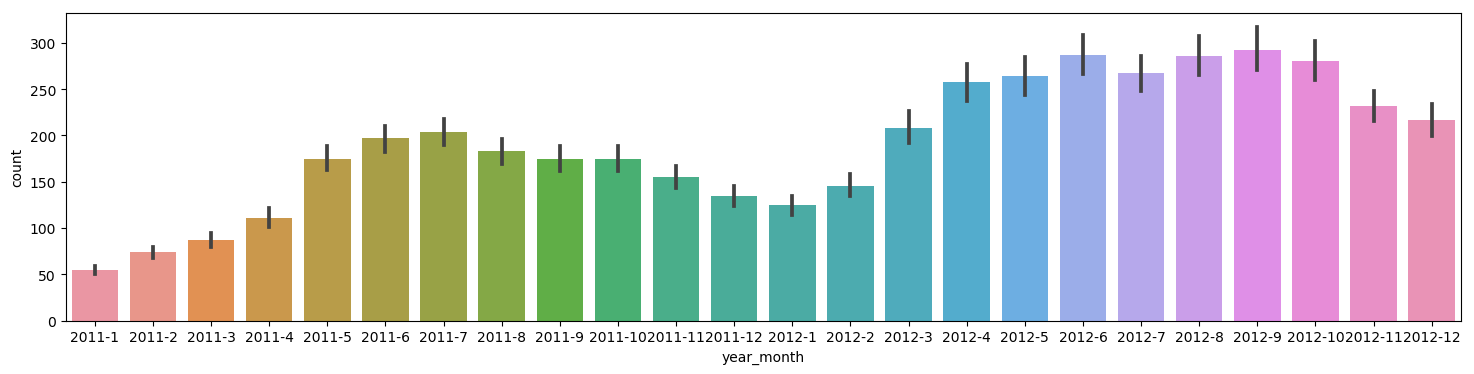

In [45]:
fig,ax3=plt.subplots()
fig.set_size_inches(18,4)
sns.barplot(data=train,x="year_month",y="count",ax=ax3)
# 대여량이 많이 증가한 것을 알 수 있음

In [50]:
# 이상치 제거 
# 이상치가 없는 train데이터 시각화
np.abs(train["count"]-train['count'].mean()) # 평균을 빼고 절대값 취하기

3*train['count'].std() #181*3 = 543 => 이 값보다 클 경우를 이상치로 설정

543.4333614908548

In [55]:
np.abs(train["count"]-train['count'].mean()) <= 3*train['count'].std()
# false로 나온 값이 이상치
trainWithoutOutliers=train[np.abs(train["count"]-train['count'].mean()) <= 3*train['count'].std()]
trainWithoutOutliers.shape # (10739, 20)
train.shape

(10886, 20)

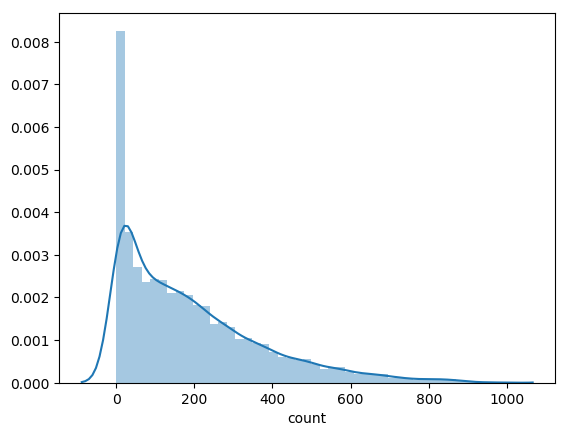

In [56]:
sns.distplot(train['count']) # 비율

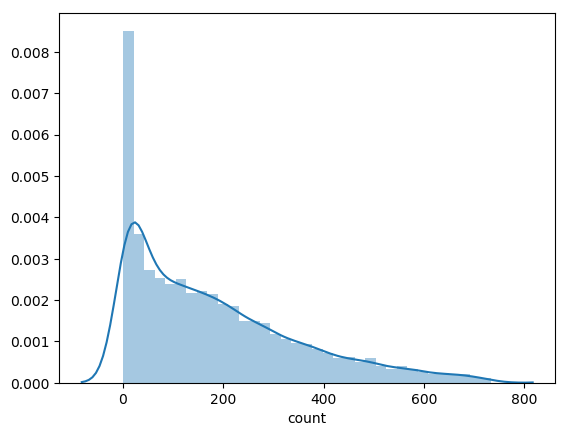

In [57]:
# 이상치를 제거한 dist
sns.distplot(trainWithoutOutliers["count"])

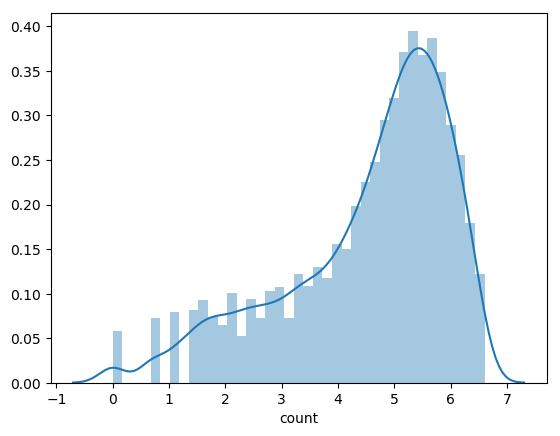

In [59]:
# 로그를 취한 후 시각화
# 자료가 정규분포를 따른게 바람직하므로 정규분포를 따르도록 데이터 전처리 해야함
sns.distplot(np.log(trainWithoutOutliers["count"]))

### 랜덤포레스트 기반 예측
    - train, test 데이터 분리 후 예측

In [146]:
train=pd.read_csv("data/bike-sharing-demand/train.csv",parse_dates=["datetime"])
train.shape
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [147]:
test=pd.read_csv("data/bike-sharing-demand/test.csv",parse_dates=["datetime"])
test.shape
# casual+registered=count 이므로 train에는 3개의 변수가 없음

(6493, 9)

In [148]:
train['year']=train['datetime'].dt.year # 연도 추출
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train['dayofweek']=train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [149]:
test['year']=test['datetime'].dt.year # 연도 추출
test['month']=test['datetime'].dt.month
test['day']=test['datetime'].dt.day
test['hour']=test['datetime'].dt.hour
test['minute']=test['datetime'].dt.minute
test['second']=test['datetime'].dt.second
test['dayofweek']=test['datetime'].dt.dayofweek
test.shape

(6493, 16)

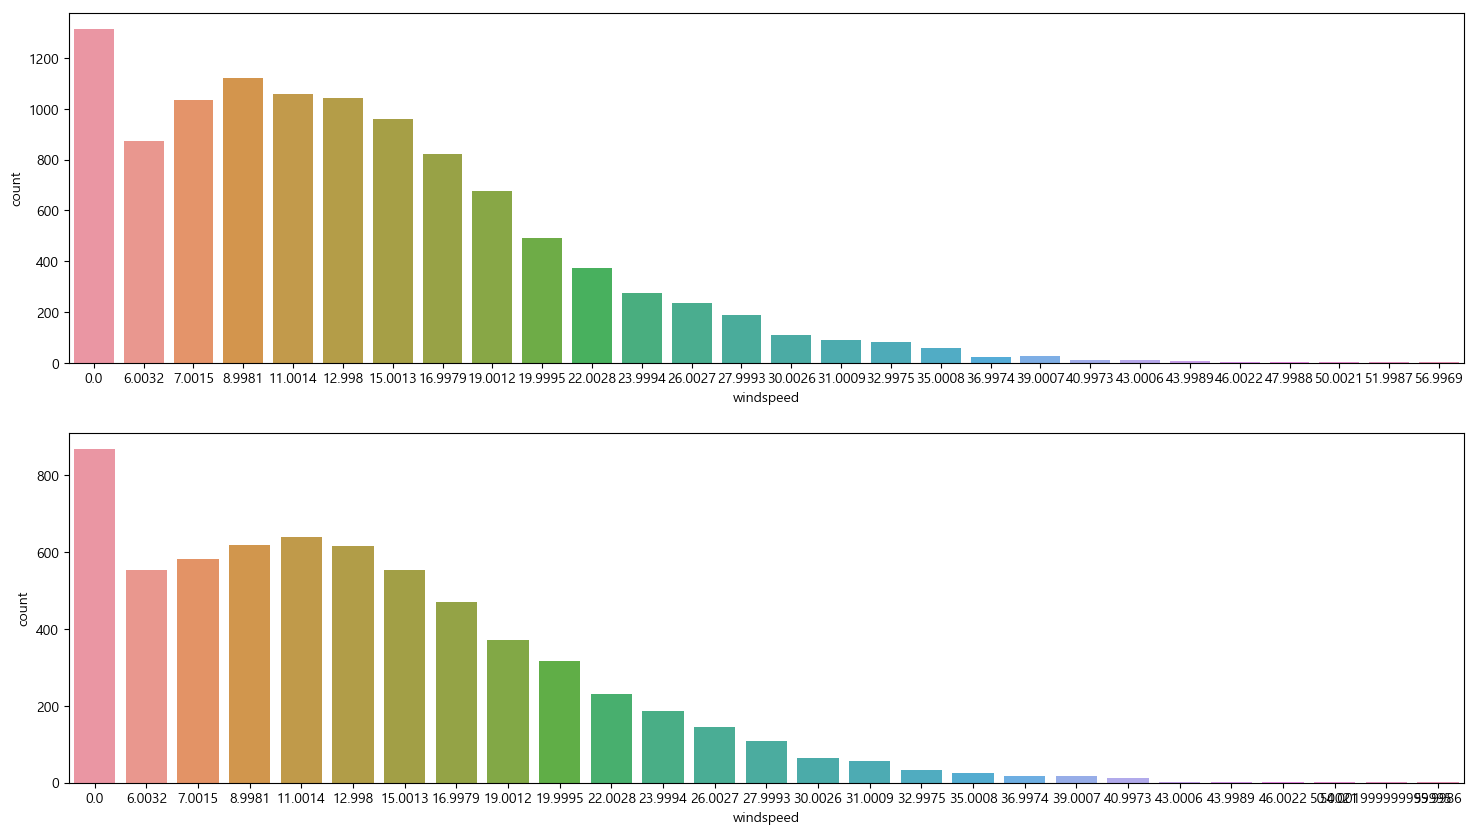

In [150]:
# 풍속이 0인 값을 다른 값으로 대체
fig, axes=plt.subplots(nrows=2)
fig.set_size_inches(18,10)
sns.countplot(data=train,ax=axes[0],x="windspeed") # 바람 속도에 따른 자전거 대여 횟수
sns.countplot(data=test,ax=axes[1],x="windspeed")
# 두 데이터 모두 0값이 많으므로 특정값으로 대체할 필요가 있음

In [151]:
# 풍속이 0인 값을 일괄적으로 평균으로 대체하는 코드
#train.loc[train["windspeed"]==0,"windspeed"] = train["windspeed"].mean()
#test.loc[test["windspeed"]==0,"windspeed"] = test["windspeed"].mean()

In [152]:
# 풍속 0, 풍속이 0이 아닌 것
trainWind0 = train.loc[train["windspeed"]==0]
trainWindNot0 = train.loc[train["windspeed"]!=0]
print(trainWind0.shape) #(1313, 19)
print(trainWindNot0.shape) # (9573, 19)

(1313, 19)
(9573, 19)


#### k-최근접 이웃 (k-NN 알고리즘)
    - 파이썬 라이브러리를 활용한 머신러닝 P.63
    - 
    - mglearn.plots.plot_knn_classification(n_neighbors=1) : 
      가장 근접한 점 1개만 보겠다는 의미
    - k값을 너무 크거나 작은 값을 주면 분류 결과에 대한 오류가 높아질 수 있음

In [153]:
# 머신러닝 알고리즘 적용해 풍속을 예측해서 결측값 처리
from sklearn.ensemble import RandomForestClassifier

In [154]:
def predict_windspeed(data):
    dataWind0=data.loc[data["windspeed"]==0]
    dataWindNot0=data.loc[data["windspeed"]!=0]
    wCol=['season','weather','humidity','month','temp','year','atemp'] #feature 선택
    
    #풍속이 0이 아닌 데이터들의 타입을 str로 변환
    #분류기의 결과가 연속형이 아닌 범주형으로 출력되므로 숫자형을 str 형태로 변환
    dataWindNot0['windspeed']=dataWindNot0['windspeed'].astype('str')
    rfModel_wind=RandomForestClassifier()
    # 풍속이 0이 아닌 값으로 모델 생성
    # 풍속이 0인 값들을 예측
    rfModel_wind.fit(dataWindNot0[wCol],dataWindNot0['windspeed']) 
    # 모델 생성 fit(모델을 만들기 위한 입력 데이터(feature),모델을 만들기 위한 출력 데이터(feature))
    
    # 학습된 모델을 사용해서 예측하기
    wind0Values=rfModel_wind.predict(X=dataWind0[wCol])
    
    predictWind0=dataWind0
    predictWindNot0=dataWindNot0
    
    predictWind0['windspeed']=wind0Values
    data=predictWindNot0.append(predictWind0)
    data['windspeed']=data['windspeed'].astype('float')
    data.reset_index(inplace=True)


    return data


In [155]:
train=predict_windspeed(train)
test=predict_windspeed(test)

In [156]:
print(train)
print("="*70)
print(test)

       index            datetime  season  holiday  workingday  weather   temp  \
0          5 2011-01-01 05:00:00       1        0           0        2   9.84   
1         10 2011-01-01 10:00:00       1        0           0        1  15.58   
2         11 2011-01-01 11:00:00       1        0           0        1  14.76   
3         12 2011-01-01 12:00:00       1        0           0        1  17.22   
4         13 2011-01-01 13:00:00       1        0           0        2  18.86   
5         14 2011-01-01 14:00:00       1        0           0        2  18.86   
6         15 2011-01-01 15:00:00       1        0           0        2  18.04   
7         16 2011-01-01 16:00:00       1        0           0        2  17.22   
8         17 2011-01-01 17:00:00       1        0           0        2  18.04   
9         18 2011-01-01 18:00:00       1        0           0        3  17.22   
10        19 2011-01-01 19:00:00       1        0           0        3  17.22   
11        20 2011-01-01 20:0

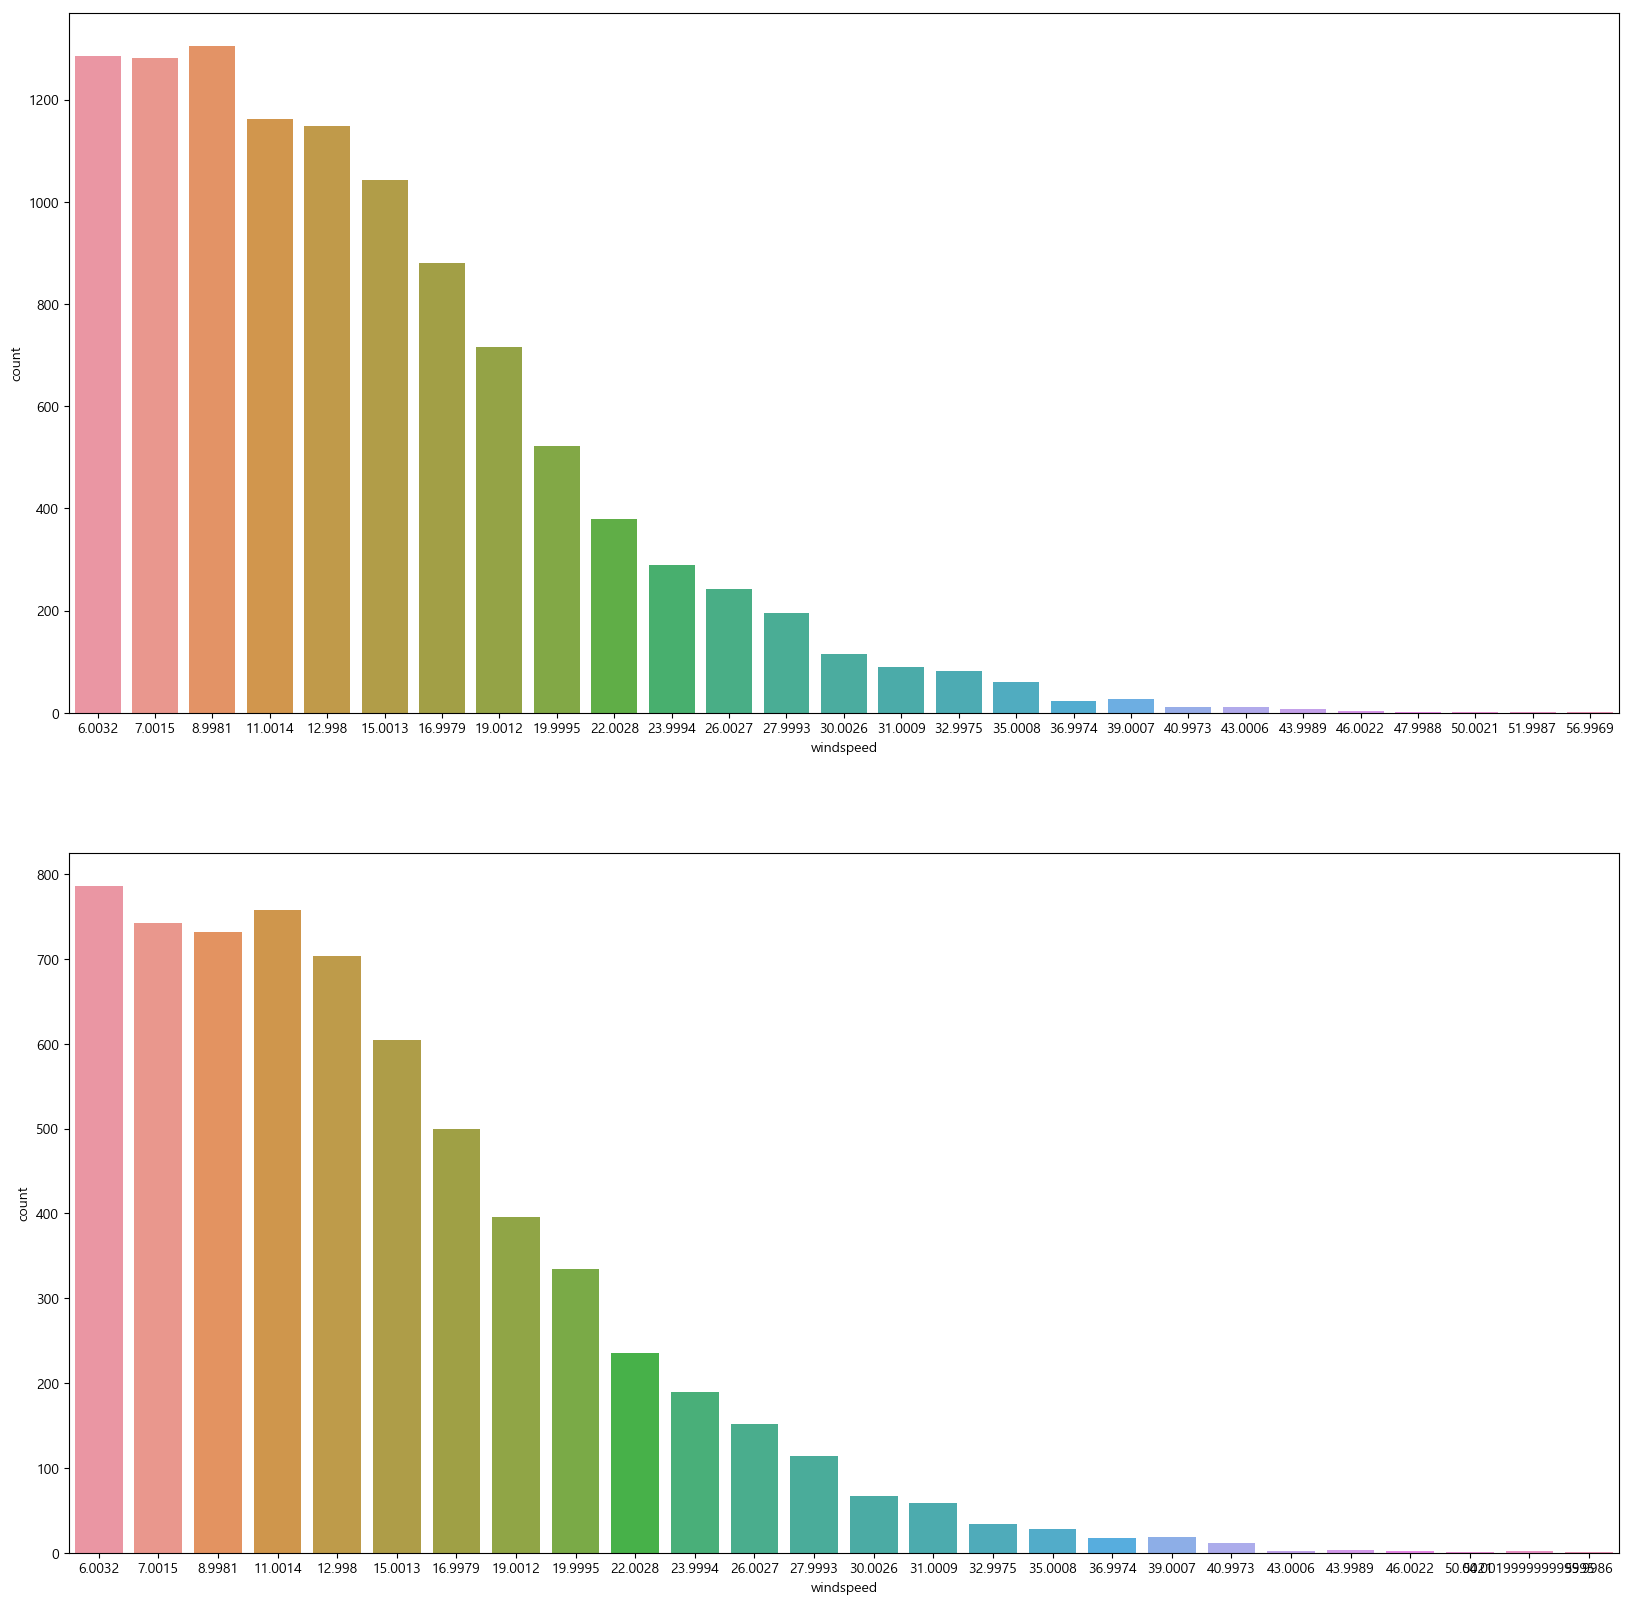

In [158]:
# x축 : 풍속 y축 : count 시각화 => 풍속이 0인 값이 안나오도록 출력
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(20,20)
sns.countplot(data=train,x="windspeed",ax=axes[0])
sns.countplot(data=test,x="windspeed",ax=axes[1])

#### feature 선택 
    - 도메인에 대한 지식이 충분하면 괜찮지만 그렇지 않을 경우, feature selection 방법을 써서 추출할 수 있음
    - 신호와 잡음 구분을 할 줄 알아야함
    - feature가 무조건 많다고해서 좋은 성능이 보장되진 않음
    - 피처를 하나씩 추가해보면서 (변경), 성능이 좋지 않은 피처는 제거

In [159]:
train.columns

Index(['index', 'datetime', 'season', 'holiday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'dayofweek'],
      dtype='object')

In [160]:
# 회귀분석 등과 같은 모델을 적용할 때, 범주형이 필요하므로 범주형으로 변환
# 범주형 변환말고 원핫인코딩 변환도 가능 
cfn=['season','holiday','workingday','weather','dayofweek','year','month','hour']
train.info() # 대부분의 데이터가 정수형이므로 범주형으로 변환하고자함
for var in cfn:
    train[var]=train[var].astype('category')
    test[var]=test[var].astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
index         10886 non-null int64
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(16)
memory usage: 1.7 MB


In [162]:
# 연습문제 1. RMSLE 수식을 직접 구현한 함수
# def rmsle(pv,av):
#     np.log(pv)

In [166]:
# 랜덤 포레스트를 활용한 대여수 예측
from sklearn.ensemble import RandomForestClassifier

In [192]:
# 랜덤포레스트 객체 생성 (random-_state : 동일한 난수 생성,
#n_jobs : 시스템의 코어 개수 설정(-1:모든 코어 사용), n_estimators : 트리 개수 설정)
model=RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)
model
cfn=['season','holiday','workingday','weather','dayofweek','year','month','hour']
#model.fit(트레이닝x, 트레이닝y)
model.fit(train[cfn],train['count'])

# 예측 
#예측결과(count)=model.predict(테스트테이터의 x)
countValues=model.predict(X=test[cfn])
countValues.shape
# submission['count']=예측결과(count)
# 제출-> 등수

(6493,)

In [190]:
test["count"]=countValues
test.columns

Index(['index', 'datetime', 'season', 'holiday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day',
       'hour', 'minute', 'second', 'dayofweek', 'count'],
      dtype='object')

In [191]:
submission=test[['datetime',"count"]]
submission.to_csv("submit_bike.csv",index=False)

In [194]:
# k-NN 알고리즘 사용
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=3)

model1.fit(train[cfn],train['count'])

countValues1=model1.predict(X=test[cfn])
countValues1.shape

(6493,)

In [195]:
submission1=test[["datetime"]]
submission1["count"]=countValues1
submission1.to_csv("submit_bike1.csv",index=False)